# Analysis and Predict for Titanic data

### 처리 순서
##### 1. Train/Test 데이터 준비
##### 2. 데이터 기본정보 확인
##### 3. 데이터 전처리
######  &emsp; 3-1. 불필요한 컬럼 삭제
######  &emsp; 3-2. NaN 데이터 처리
######  &emsp; 3-3. 그외 전처리
##### 4. Encoding
##### 5. Scaling
##### 6. train_test_split()
##### 7. 모델 학습/평가
##### 8. 실제 예측

##### import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Train/Test 데이터 준비

In [2]:
from pathlib import Path
Path.cwd()

WindowsPath('e:/Study/Python/Streamlit/practic_file/AiWebBkup/StDashboard/jnotebook')

In [3]:
TRAIN_DATA = Path.cwd().parent / 'DATA/titanic_train.csv'
TEST_DATA = Path.cwd().parent / 'DATA/titanic_test.csv'

In [4]:
dfTrain = pd.read_csv(TRAIN_DATA)
dfTrain.shape

(891, 12)

In [5]:
dfTest = pd.read_csv(TEST_DATA)
dfTest.shape

(418, 11)

### 2. 데이터 기본 정보 확인

##### 데이터의 내용을 확인한다.

In [6]:
dfTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
dfTest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##### Null 데이터 확인한다.

##### np.nan 은 float type, 만일 있으면 int 컬럼이 --> float 컬럼이 된다.

In [7]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


##### describe() 는 number type 만 보여줌.

In [8]:
dfTrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
dfTest.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 3. 데이터 전처리

#####  AI 알고리즘을 실행하기 전에, 데이터를 목적에 맞게 변환한다.
##### EDA (Exploratory Data Analysis), 탐색적 데이터 분석을 통해, 데이터 특성을 파악한다.
##### --------------------------------------------------------------------------------------------
##### EDA (Exploratory Data Analysis), 탐색적 데이터 분석
###### &emsp; - 데이터를 다양한 각도에서 관찰하고 이해하는 과정
###### &emsp; - 표, 그래프, 통계값 등 다양한 지식 등을 활용, (예를 들어) 이상치, 속성간의 관계, 주요한 속성 등을 찾아낸다.
###### &emsp; *. 이 과정을 확장하여, 데이터 분석을 통해 [데이터 인사이트]를 발굴할 수도 있다.

##### EDA (매우 다양하게 진행할 수 있다)

In [9]:
dfTrain.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

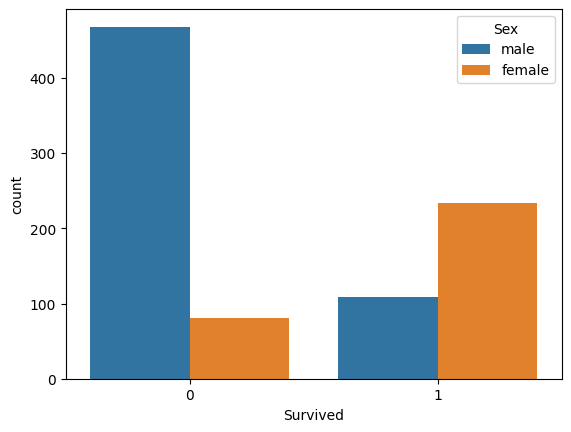

In [10]:
sns.countplot(data=dfTrain, x='Survived', hue='Sex')

### 3-1. 불필요한 컬럼 삭제

##### -. target 컬럼에 영향을 주는 feature(컬럼) 를 선택 --> feature selection 은 중요한 분야임
##### -. 여기서는 직관적으로 불필요한 컬럼을 선택함

##### 함수로 만들면, train 및 test 데이터에 동일하게 적용할 수 있다.

In [11]:
# 불필요한 컬럼 삭제
def del_cols(df):
    df = df.copy()
    cols = ['PassengerId', 'Name', 'Ticket']
    df = df.drop(cols, axis=1)
    print(f"del_cols(): {df.shape=}")
    return df

In [12]:
dfDrop = del_cols(dfTrain)
dfDrop.shape

del_cols(): df.shape=(891, 9)


(891, 9)

### 3-2. NaN 처리

##### -. NaN 값이 많은 컬럼은 삭제한다.
##### -. 아니면, NaN 을 다른 값으로 바꾼다. (평균값, 중간값, 최빈값 등)

In [13]:
cols = ['Age', 'Fare', 'Cabin', 'Embarked']
for c in cols:
    print('-' * 30, c)
    print(dfDrop[c].value_counts())

------------------------------ Age
Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64
------------------------------ Fare
Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64
------------------------------ Cabin
Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64
------------------------------ Embarked
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [14]:
dfDrop.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [15]:
dfDrop.Age.mean()

29.69911764705882

In [16]:
dfDrop.Fare.mean()

32.204207968574636

##### Cabin 컬럼은 나중에 첫 글자만 추출할 것이므로, NaN -> Z 로 치환한다. (현 데이터에 Z 사용 안하므로)

In [17]:
# null 처리
def na_handle(df):
    df = df.copy()
    df['Age'] = df.Age.fillna(df.Age.mean()).astype('int')
    df['Cabin'] = df.Cabin.fillna('Z')
    df['Embarked'] = df.Embarked.fillna(df.Embarked.mode().values[0])
    df['Fare'] = df.Fare.fillna(df.Fare.mean())    
    print(f"na_handle(): {df.shape=}")
    return df

In [18]:
dfNa = na_handle(dfDrop)
dfNa.shape

na_handle(): df.shape=(891, 9)


(891, 9)

### 3-3. 그 외 처리

##### -. Cabin 컬럼의 첫 글자는 의미가 있다.

In [19]:
# 그 외 처리
def pre_etc(df):
    df = df.copy()
    df['Cabin'] = df.Cabin.str[0]
    print(f"pre_etc(): {df.shape=}")
    return df

In [20]:
dfEtc = pre_etc(dfNa)
dfEtc.shape

pre_etc(): df.shape=(891, 9)


(891, 9)

### 전처리 함수들 정리

In [21]:
# 위 3개 모음
def pre_process(df):
    df = del_cols(df)
    df = na_handle(df)
    df = pre_etc(df)
    print(f"pre_process: {df.shape=}")
    return df

In [22]:
dfPreN = pre_process(dfTrain)

del_cols(): df.shape=(891, 9)
na_handle(): df.shape=(891, 9)
pre_etc(): df.shape=(891, 9)
pre_process: df.shape=(891, 9)


In [25]:
dfPreT = pre_process(dfTest)

del_cols(): df.shape=(418, 8)
na_handle(): df.shape=(418, 8)
pre_etc(): df.shape=(418, 8)
pre_process: df.shape=(418, 8)


##### 전처리 후, 데이터 확인

In [23]:
dfPreN.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [26]:
dfPreN.isna().sum().sum(), dfPreT.isna().sum().sum()

(0, 0)

### 4. Label Encoding

##### (1) 문자열 컬럼에, 각 컬럼별로 수행한다. (2) Train 과 Test 에 동일한 Encoder 를 사용한다.
##### (참고) One-Hot Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
def label_encode(df1, df2):
    le = LabelEncoder()
    
    df1 = df1.copy()
    df2 = df2.copy()
    for c in df1.select_dtypes('object').columns:
        le.fit(df1[c])
        df1[c] = le.transform(df1[c])
        df2[c] = le.transform(df2[c])
    print(f"label_encode(): {df1.shape=}, {df2.shape=}")
    return df1, df2

In [32]:
dfLabelN, dfLabelT = label_encode(dfPreN, dfPreT)

label_encode(): df1.shape=(891, 9), df2.shape=(418, 8)


### 5. Standard Scaling

##### (1) 모든 컬럼에, 한꺼번에 수행한다. (2) Train 과 Test 에 동일한 Scaler 를 사용한다.
##### (참고) MinMaxScaling

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
def standard_scale(df1, df2):
    scaler = StandardScaler()
    
    df1 = df1.copy()
    df2 = df2.copy()
    target = df1.pop('Survived')
    
    scaler.fit(df1)
    scale1 = scaler.transform(df1)
    scale2 = scaler.transform(df2)
    
    tmp = pd.DataFrame(scale1, columns=df1.columns)
    df1 = pd.concat([target, tmp], axis=1)
    df2 = pd.DataFrame(scale2, columns=df2.columns)
    
    print(f"standard_scale(): {df1.shape=}, {df2.shape=}")
    return df1, df2

In [35]:
dfScaleN, dfScaleT = standard_scale(dfLabelN, dfLabelT)

standard_scale(): df1.shape=(891, 9), df2.shape=(418, 8)


### 6. train_test_split()

##### dfTrain 대상, dfTest 는 적용대상 아님
##### &emsp; -. Train 데이터는 모델 학습용, Test 데이터는 모델 평가용
##### &emsp; -. Valid 데이터는 과적합(Overfitting) 방지용
##### stratify=y : y 데이터의 비율을 유지하면서, 데이터를 분리함

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = dfScaleN.drop('Survived', axis=1)
y = dfScaleN.Survived

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=1004, stratify=y)
print(f"{trainX.shape=}, {testX.shape=}, {trainy.shape=}, {testy.shape=}")

trainX.shape=(712, 8), testX.shape=(179, 8), trainy.shape=(712,), testy.shape=(179,)


# 7. 모델 학습/평가

##### 처리 과정 : 알고리즘 선택(초기 모델) -> 학습 -> 평가 --(반복)--> 최종 모델
##### 분류 알고리즘 예시 : 결정 트리, 랜덤 포레스트, 로지스틱 회귀

### Decision Tree, 결정 트리 알고리즘

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [39]:
dt = DecisionTreeClassifier(random_state=1004)
dt.fit(trainX, trainy)
dtPreds = dt.predict(testX)

acc = accuracy_score(testy, dtPreds)
print(f"Decision Tree 정확도 : {acc:.4f}")

Decision Tree 정확도 : 0.7654


### 다른 알고리즘

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [41]:
rf = RandomForestClassifier(random_state=1004)
lr = LogisticRegression(random_state=1004)

rf.fit(trainX, trainy)
lr.fit(trainX, trainy)

rfPreds = rf.predict(testX)
lrPreds = lr.predict(testX)

rfAcc = accuracy_score(testy, rfPreds)
lrAcc = accuracy_score(testy, lrPreds)
print(f"Random Forest 정확도 : {rfAcc:.4f}")
print(f"Logistic Regression 정확도 : {lrAcc:.4f}")

Random Forest 정확도 : 0.7989
Logistic Regression 정확도 : 0.8045


### 8. 실제 예측

##### 최종 모델을 만든 후에, 실제 데이터를 예측한다.
##### target 컬럼이 없는 데이터에, 최종 모델을 적용해 값을 예측함.
##### (최종 모델 활용 예시) : 실제 데이터 예측, 해커톤 답안 제출, 웹 프로그램에 활용, 등등등

In [42]:
# dfTest = pd.read_csv(TEST_DATA)
# dfScaleT = standard_scale(dfLabelT)

# REAL_DATA, dfReal, dfPreR, dfLabelR, dfScaleR
dfScaleR = dfScaleT
dfScaleR.shape

(418, 8)

In [43]:
preds = lr.predict(dfScaleR)
print(f"{preds.shape=}")

preds.shape=(418,)


In [44]:
preds[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

# 데이터 분석 예시

In [45]:
dfTrain.shape, dfPreN.shape

((891, 12), (891, 9))

In [46]:
for c in dfPreN.columns:
    print('-' * 30, c)
    print(dfPreN[c].value_counts())

------------------------------ Survived
Survived
0    549
1    342
Name: count, dtype: int64
------------------------------ Pclass
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
------------------------------ Sex
Sex
male      577
female    314
Name: count, dtype: int64
------------------------------ Age
Age
29    197
24     31
22     27
28     27
30     27
     ... 
66      1
53      1
80      1
12      1
74      1
Name: count, Length: 71, dtype: int64
------------------------------ SibSp
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
------------------------------ Parch
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
------------------------------ Fare
Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64
------------------------------ 

In [46]:
exclude = ['Age', 'Fare']
include = [c for c in dfPreN.columns if c not in exclude]
for c in include:
    print('-' * 30, c)
    print(dfPreN[c].value_counts())

------------------------------ Survived
Survived
0    549
1    342
Name: count, dtype: int64
------------------------------ Pclass
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
------------------------------ Sex
Sex
male      577
female    314
Name: count, dtype: int64
------------------------------ SibSp
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
------------------------------ Parch
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
------------------------------ Cabin
Cabin
Z    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64
------------------------------ Embarked
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [47]:
for c in exclude:
    sns.histplot(data=dfPreN, x=c, bins=10)
    plt.show()

NameError: name 'exclude' is not defined

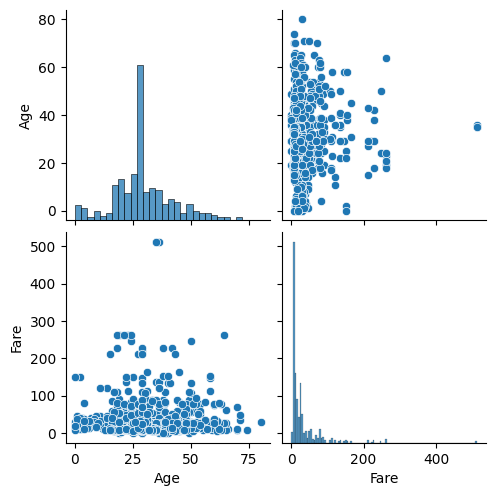

In [48]:
sns.pairplot(data=dfPreN[exclude])

In [49]:
include

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked']

In [48]:
for c in include:
    sns.countplot(data=dfPreN, x=c)
    plt.show()

NameError: name 'include' is not defined

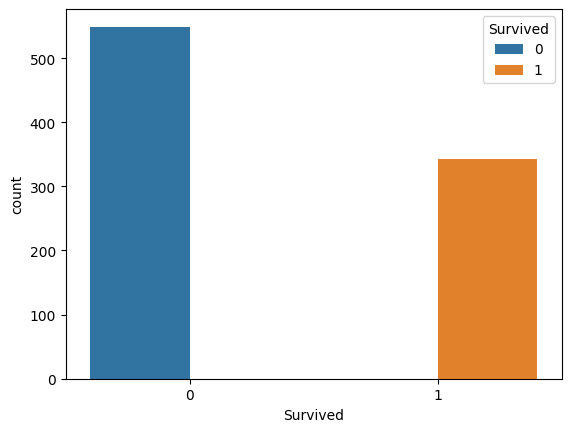

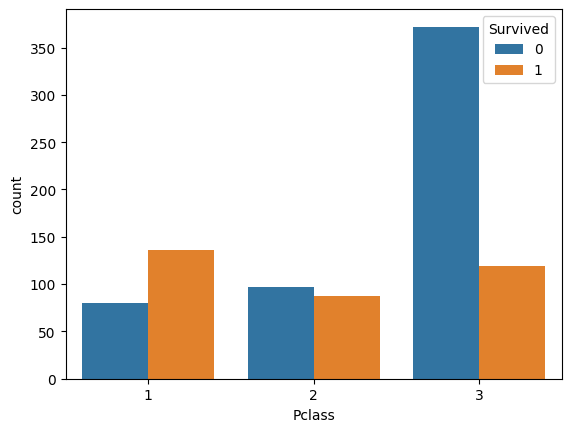

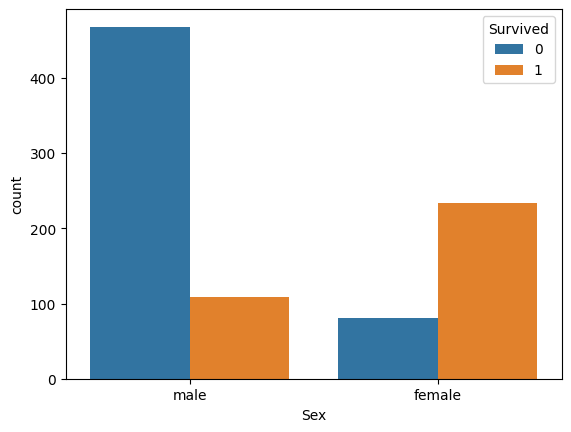

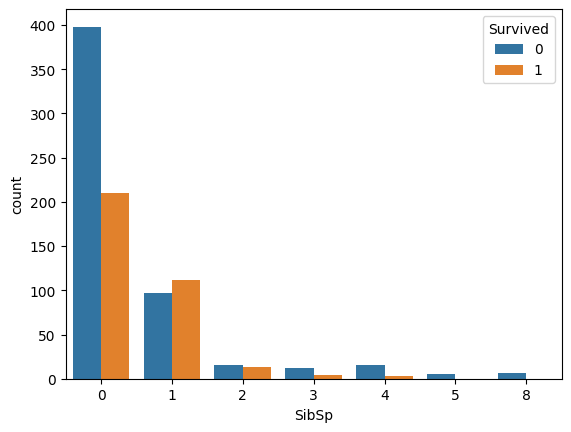

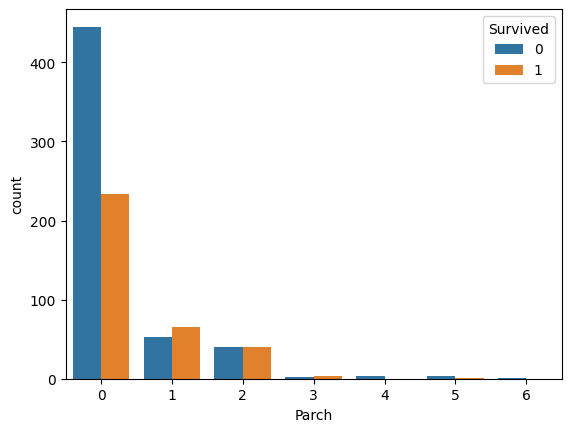

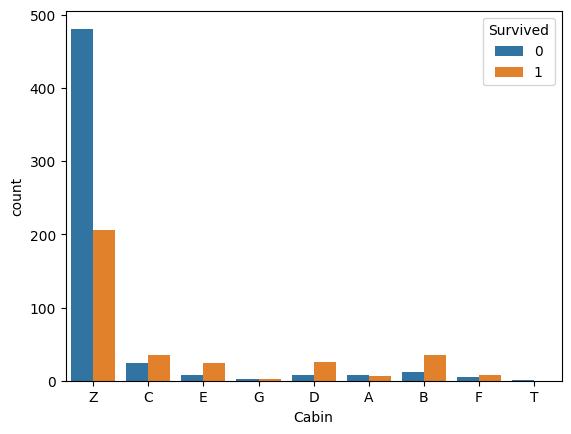

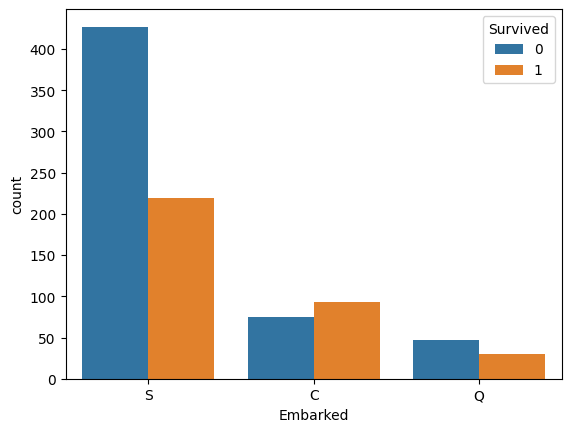

In [51]:
for c in include:
    sns.countplot(data=dfPreN, x=c, hue='Survived')
    plt.show()

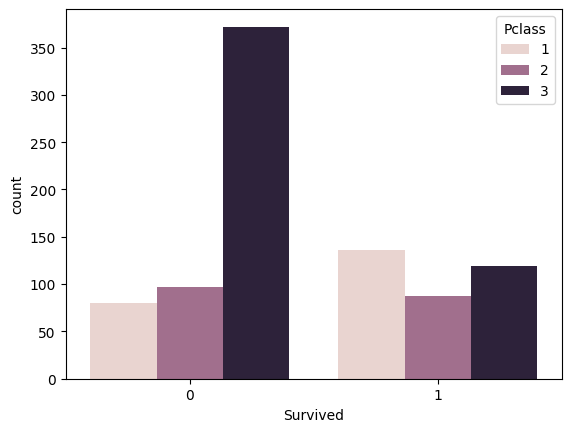

In [49]:
sns.countplot(data=dfPreN, x='Survived', hue='Pclass')
plt.show()